In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import plotly.express as px

In [ ]:
df = pd.read_csv('Indian_Foods_Dataset_With_Tags_Final.csv')
print(df.shape) # no of rows and columns
print(df.columns.to_list()) # names of all the columns in the list

(100, 23)
['Food Name', 'Category', 'Calories', 'Carbs', 'Fats', 'Protein', 'Fiber', 'GI', 'GL', 'Insulin Index', 'Magnesium', 'Potassium', 'Sodium', 'Calcium', 'Iron', 'Vitamin D', 'Vitamin C', 'Folate', 'Vegan/Vegetarian', 'Processed Level', 'recommendation', 'prepration_method', 'portion_guidance']


In [6]:
le = LabelEncoder()
df['recommendation_encoded'] = le.fit_transform(df['recommendation'])
# 0 - ideal
# 1 - occasional
# 2 - avoid

In [33]:
scaler = StandardScaler()

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
scaled_data = scaler.fit_transform(df[numerical_columns])
df_scaled = pd.DataFrame(scaled_data, columns=numerical_columns)

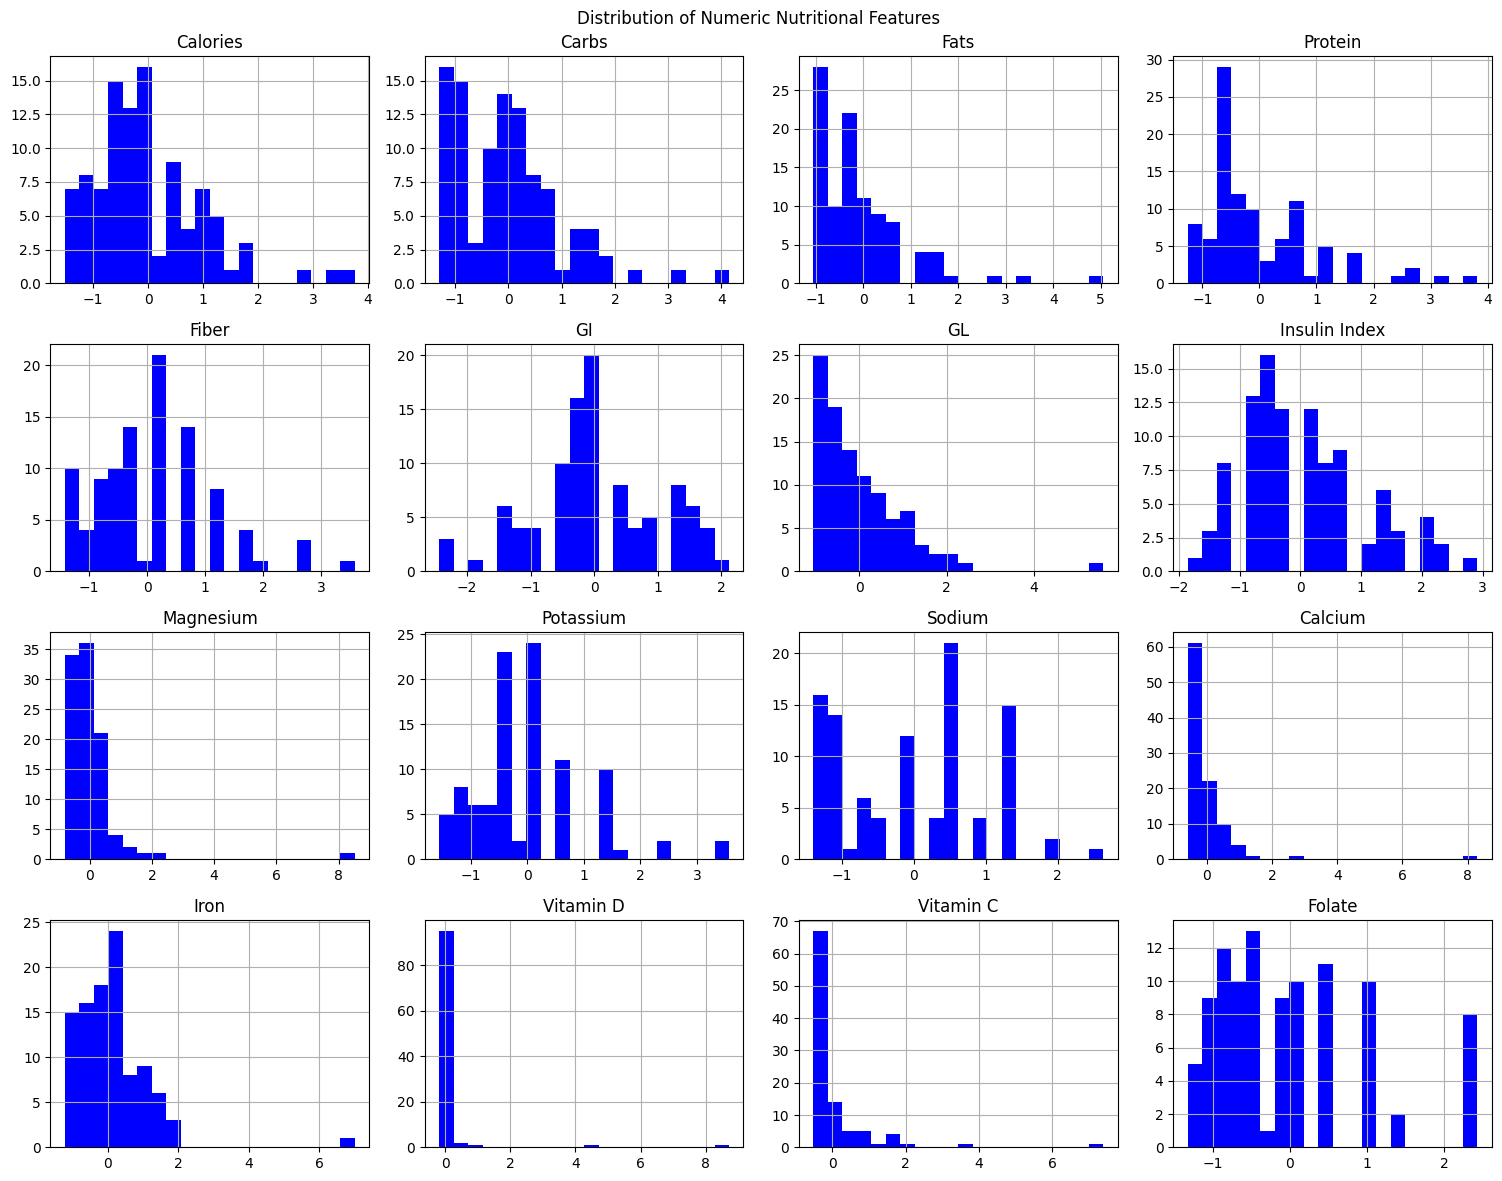

In [34]:
# EDA

df_scaled.hist(figsize=(15,12),bins=20,color='blue')
plt.suptitle("Distribution of Numeric Nutritional Features")
plt.tight_layout()
plt.show()

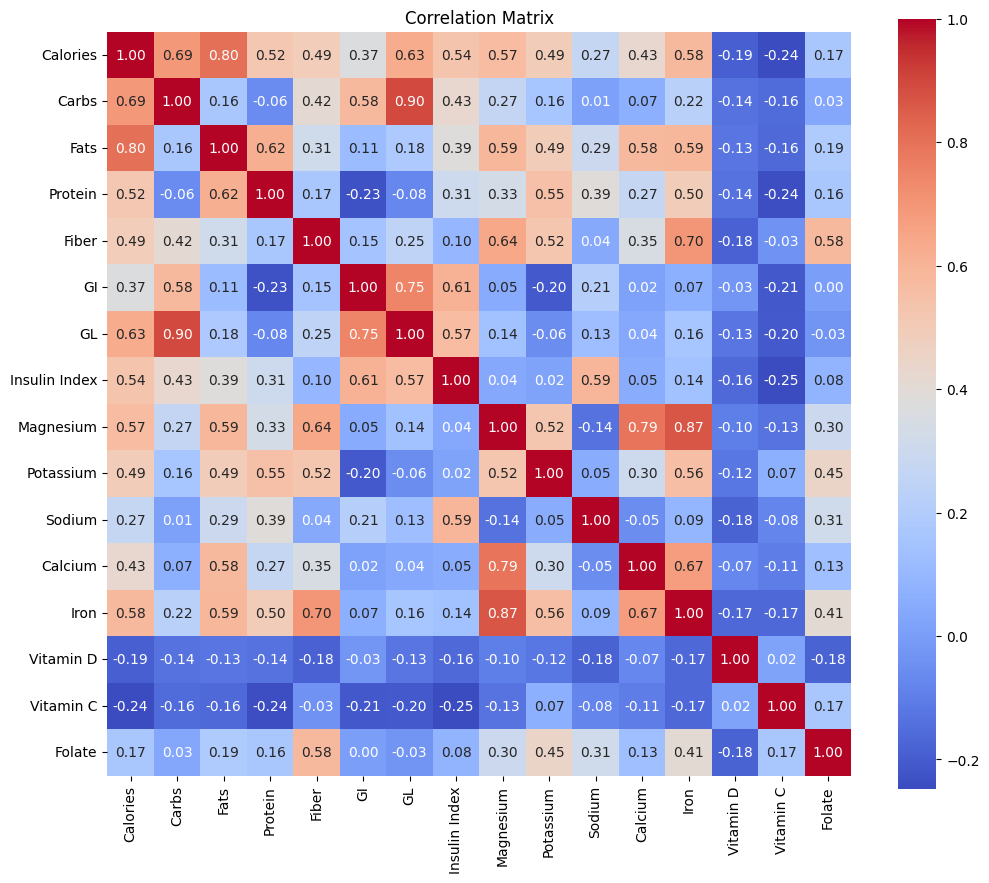

In [11]:
# correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(df_scaled.corr(),annot=True,cmap='coolwarm',fmt='.2f',square=True)
plt.title("Correlation Matrix")
plt.show()

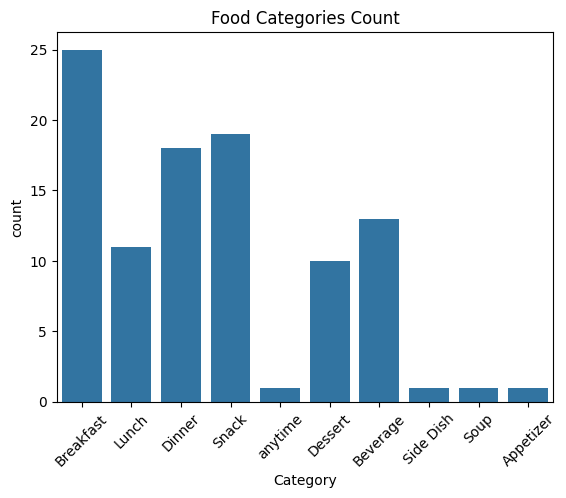

In [18]:
sns.countplot(data=df,x="Category")
plt.title("Food Categories Count")
plt.xticks(rotation=45)
plt.show()

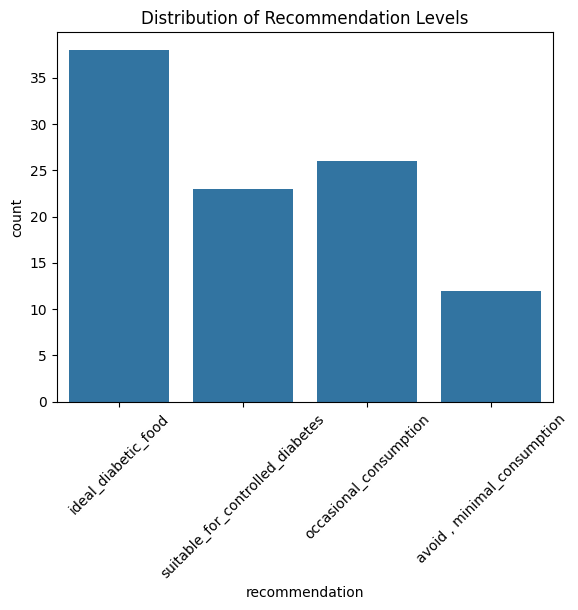

In [21]:
sns.countplot(data=df,x='recommendation')
plt.title("Distribution of Recommendation Levels")
plt.xticks(rotation=45)
plt.show()

In [24]:
df_scaled.isnull().sum()
df_scaled.fillna(df_scaled.mean(), inplace=True)

In [26]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=pca_result,columns=['PC1','PC2'])
pca_df["recommendation"] = df['recommendation']

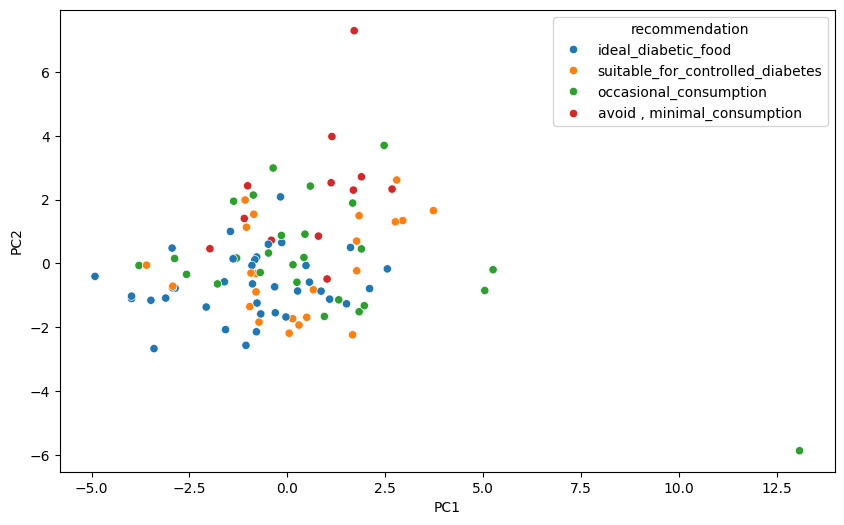

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=pca_df,x="PC1",y='PC2',hue='recommendation')
plt.show()

# foods with high sugar content and fats have a higher value of pc1(nutritional value) and pc2(GI)

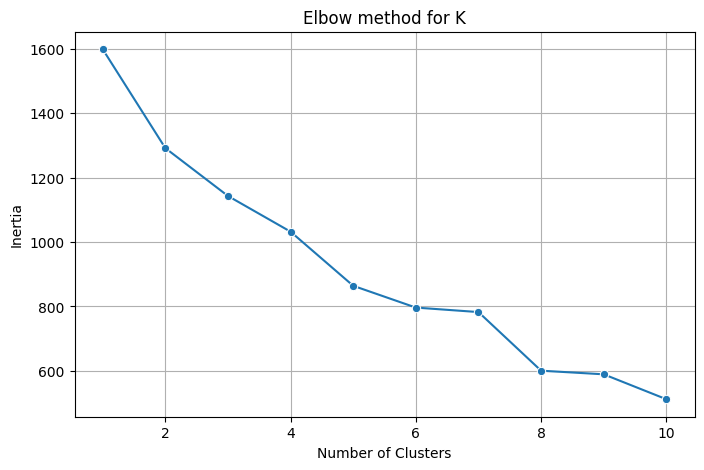

In [ ]:
# Elbow method to find K
inertia = []
K = range(1,11)

for k in K:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
sns.lineplot(x=K,y=inertia,marker='o')
plt.title("Elbow method for K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [40]:
df.isna().sum()
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())


In [41]:
df.isna().sum()

Food Name                 0
Category                  0
Calories                  0
Carbs                     0
Fats                      0
Protein                   0
Fiber                     0
GI                        0
GL                        0
Insulin Index             0
Magnesium                 0
Potassium                 0
Sodium                    0
Calcium                   0
Iron                      0
Vitamin D                 0
Vitamin C                 0
Folate                    0
Vegan/Vegetarian          0
Processed Level           0
recommendation            1
prepration_method         1
portion_guidance          1
recommendation_encoded    0
dtype: int64

In [43]:
df.dropna(inplace=True)
df.isna().sum()

Food Name                 0
Category                  0
Calories                  0
Carbs                     0
Fats                      0
Protein                   0
Fiber                     0
GI                        0
GL                        0
Insulin Index             0
Magnesium                 0
Potassium                 0
Sodium                    0
Calcium                   0
Iron                      0
Vitamin D                 0
Vitamin C                 0
Folate                    0
Vegan/Vegetarian          0
Processed Level           0
recommendation            0
prepration_method         0
portion_guidance          0
recommendation_encoded    0
dtype: int64

In [47]:
import numpy as np

# Check for NaNs in scaled_data
print("NaNs in scaled_data:", np.isnan(scaled_data).sum())


NaNs in scaled_data: 1


In [48]:
df_clean = df[numerical_columns].dropna()
scaled_data = scaler.fit_transform(df_clean)


In [ ]:

# Check for NaNs in scaled_data
print("NaNs in scaled_data:", np.isnan(scaled_data).sum())


NaNs in scaled_data: 0


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df['cluster'] = clusters

C:\Users\Heet\AppData\Local\Temp\ipykernel_10340\2620520274.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=pca_df,x='PC1',y='PC2',style='recommendation',palette='Set2',s=100)


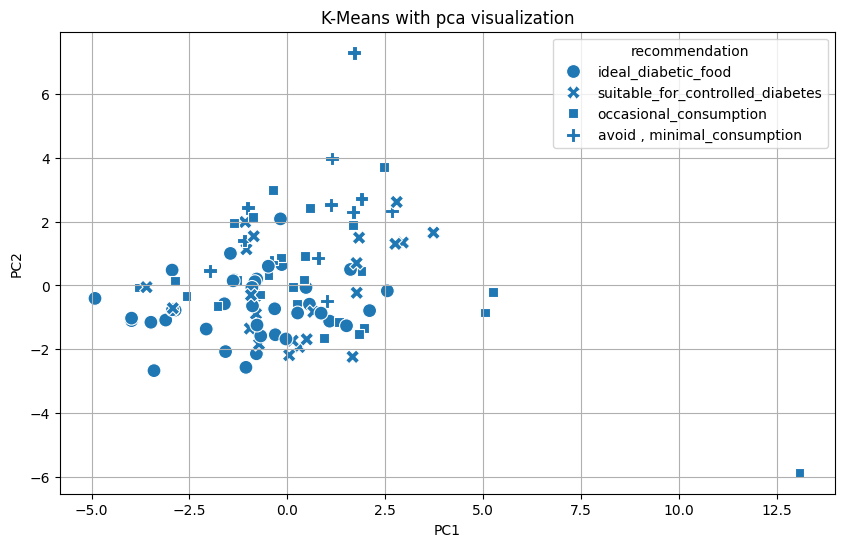

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=pca_df,x='PC1',y='PC2',style='recommendation',palette='Set2',s=100)
plt.title('K-Means with pca visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

In [55]:
X = df[numerical_columns]
y = df['recommendation_encoded']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random forest report:\n" , classification_report(y_test,y_pred_rf))

Random forest report:
               precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.45      0.71      0.56         7
           2       0.36      0.62      0.45         8
           3       0.00      0.00      0.00        10

    accuracy                           0.40        30
   macro avg       0.37      0.43      0.38        30
weighted avg       0.31      0.40      0.33        30

